In [1]:
import numpy as np
import pandas as pd
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
data = pd.read_csv(r'C:\Users\aswin\Downloads\titanic_dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Checking for Null Values in  Dataset

In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Replacing NaN value in Age column with Mean Value

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
num_cols=data[['Age']]
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer = imputer.fit(num_cols)
num_cols=imputer.transform(num_cols)
num_cols=pd.DataFrame(num_cols,columns=[['Age']])
data.drop(['Age'],inplace=True,axis=1)
data1=pd.concat([num_cols,data],axis=1)
data1.columns = data1.columns.map(''.join)
data1.head()

,Age,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,22.0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S
1,38.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
2,26.0,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S
3,35.0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S
4,35.0,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


# Dropping Unwanted Columns in the Dataset

In [10]:
data1.drop(['Name'],inplace=True,axis=1)

In [11]:
data1.head()

,Age,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,22.0,1,0,3,male,1,0,A/5 21171,7.2500,NaN,S
1,38.0,2,1,1,female,1,0,PC 17599,71.2833,C85,C
2,26.0,3,1,3,female,0,0,STON/O2. 3101282,7.9250,NaN,S
3,35.0,4,1,1,female,1,0,113803,53.1000,C123,S
4,35.0,5,0,3,male,0,0,373450,8.0500,NaN,S


In [12]:
data1.Sex.nunique()

2

In [13]:
data1 = data1.drop('Ticket', axis=1,)
data1= data1.drop('Fare', axis=1,)
data1= data1.drop('Cabin', axis=1,)

In [14]:
data1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
data['Embarked'].isna().sum()

2

# Replacing the NaN value in Embarked Column

In [16]:
data1["Embarked"] = data1["Embarked"].fillna("S")

In [17]:
data1["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [18]:
data1.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)
data1.Sex.replace(['male', 'female'], [1,0], inplace=True)
data1.head()

,Age,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,22.0,1,0,3,1,1,0,1
1,38.0,2,1,1,0,1,0,2
2,26.0,3,1,3,0,0,0,1
3,35.0,4,1,1,0,1,0,1
4,35.0,5,0,3,1,0,0,1


In [19]:
data1.isna().sum()

Age            0
PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

# Knn Model

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
data1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [22]:
y=data1['Survived']
X=data1.drop('Survived',axis=1)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2,random_state=42)

In [25]:
metric_k=[]
neighbors=range(3,18)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,y_train)
    y_pred_kNN=classifier.predict(X_test)
    acc= accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

In [26]:
metric_k

[0.5307262569832403,
 0.553072625698324,
 0.547486033519553,
 0.5865921787709497,
 0.553072625698324,
 0.5698324022346368,
 0.5083798882681564,
 0.5642458100558659,
 0.5139664804469274,
 0.547486033519553,
 0.5586592178770949,
 0.5698324022346368,
 0.5754189944134078,
 0.5810055865921788,
 0.547486033519553]

# Plot to Find out the K value with Maximum Accuracy

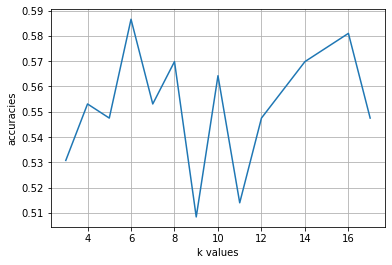

In [27]:
plt.plot(neighbors,metric_k)
plt.xlabel('k values')
plt.ylabel('accuracies')
plt.grid();

# Buliding Model with K Value having Maximum Accuracy

In [28]:
classifier=KNeighborsClassifier(n_neighbors=6)
classifier=classifier.fit(X_train,y_train)
y_pred_kNN=classifier.predict(X_test)

In [29]:
accuracy_score(y_test,y_pred_kNN)

0.5865921787709497

In [30]:
precision_score(y_test,y_pred_kNN)

0.5

In [31]:
recall_score(y_test,y_pred_kNN)

0.13513513513513514

In [32]:
confusion_matrix(y_test,y_pred_kNN)

array([[95, 10],
       [64, 10]], dtype=int64)

# SVM Model

In [33]:
from sklearn.svm import SVC

In [34]:

clf_svm=SVC(kernel='linear')
clf_svm= clf_svm.fit(X_train,y_train)
y_pred_svm=clf_svm.predict(X_test)

In [35]:
confusion_matrix(y_test,y_pred_svm)

array([[88, 17],
       [22, 52]], dtype=int64)

In [36]:
accuracy_score(y_test,y_pred_svm)

0.7821229050279329

In [37]:
clf_svm2=SVC(kernel='rbf')
clf_svm2= clf_svm.fit(X_train,y_train)
y_pred_svm2=clf_svm.predict(X_test)

In [38]:
confusion_matrix(y_test,y_pred_svm2)

array([[88, 17],
       [22, 52]], dtype=int64)

In [39]:
accuracy_score(y_test,y_pred_svm2)

0.7821229050279329

# KFold Split

In [40]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [41]:
for train_index, test_index in kf.split(X,y):
    print(train_index,test_index)

[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 33

In [42]:
def get_score(model, X_train, X_test,y_train, y_test ):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [43]:
get_score(KNeighborsClassifier(n_neighbors=6), X_train, X_test,y_train, y_test )

0.5865921787709497

In [44]:
get_score(SVC(kernel='rbf'), X_train, X_test,y_train, y_test )

0.5865921787709497

In [45]:
get_score(SVC(kernel='linear'), X_train, X_test,y_train, y_test )

0.7821229050279329

# KFold Cross Validation

In [46]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(KNeighborsClassifier(n_neighbors=6),X,y,cv=kf)

In [47]:
score

array([0.56666667, 0.75280899, 0.47191011, 0.49438202, 0.56179775,
       0.53932584, 0.56179775, 0.62921348, 0.60674157, 0.62921348])

In [48]:
score.mean()

0.5813857677902622

Meanvalue of Accuracy for Knn Model is 58.13%

In [49]:
score1 = cross_val_score(SVC(kernel='rbf'),X,y,cv=kf)
score1

array([0.56666667, 0.7752809 , 0.61797753, 0.49438202, 0.58426966,
       0.64044944, 0.56179775, 0.62921348, 0.66292135, 0.62921348])

In [50]:
score1.mean()

0.6162172284644194

Mean value of Accuracy for SVM Model with rbf kernel is 61.61%

In [51]:
score2= cross_val_score(SVC(kernel='linear'),X,y,cv=kf)
score2

array([0.81111111, 0.83146067, 0.7752809 , 0.85393258, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.86516854, 0.78651685])

In [52]:
score2.mean()

0.7957178526841447

Mean value of Accuracy for SVM model with kernel linear is 79.57%

# Stratified KFold

In [53]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)


Scaling the Input data 

In [54]:
for train_index, test_index in folds.split(X,y):
    print(train_index,test_index)

[ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 33

In [55]:
score4 = cross_val_score(KNeighborsClassifier(n_neighbors=6),X,y,cv=folds)
score4

array([0.42222222, 0.61797753, 0.39325843, 0.4494382 , 0.40449438,
       0.46067416, 0.38202247, 0.43820225, 0.40449438, 0.60674157])

In [56]:
np.mean(score4)

0.4579525593008739

Mean Accuracy Value for Knn Model Using Stratified KFold Cross Validation is 45.79%

In [57]:
score5 = cross_val_score(SVC(kernel='rbf'),X,y,cv=folds)
score5

array([0.61111111, 0.61797753, 0.61797753, 0.61797753, 0.61797753,
       0.61797753, 0.61797753, 0.61797753, 0.61797753, 0.60674157])

In [58]:
np.mean(score5)

0.616167290886392

Mean Accuracy Value for SVM Model kernel rbf Using Stratified KFold Cross Validation is 61.61%

In [59]:
score6 = cross_val_score(SVC(kernel='linear'),X,y,cv=folds)
score6

array([0.81111111, 0.78651685, 0.78651685, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.83146067, 0.78651685])

In [60]:
np.mean(score6)

0.7923470661672909

Mean Accuracy Value for SVM Model kernel linear Using Stratified KFold Cross Validation is 79.23%